In [82]:
import numpy
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from pylab import *
import os
import pandas as pd
import gc
from scipy.signal import blackman
import csv
from scipy.io import wavfile
import wave
from struct import pack
import plotly,plotly as py
#from dtw import dtw
from numpy.linalg import norm
from datetime import datetime
from datetime import timedelta
import ipywidgets as widgets
#from numba import vectorize

gc.enable()

data_path = "data/"
date = "20181205"
stereo_path = "stereo/"
vector_path = "vector/"
visual_path = "visual/"

video_start = '20190826'  #YYYYMMDD
video_end = '20191028'  #YYYYMMDD
temp_video_start = video_start[0:4] + "/" + video_start[4:6] + "/" +video_start[6:8]
temp_video_end = video_end[0:4] + "/" + video_end[4:6] + "/" +video_end[6:8]
print temp_video_start
print temp_video_end

video_startdatte = datetime.strptime(temp_video_start,'%Y/%m/%d')
video_enddate = datetime.strptime(temp_video_end,'%Y/%m/%d')

directory_list = ['cloth','metal','paper','plastic','porcelain','wood']

for mat in directory_list:
    if not os.path.exists(visual_path+mat):
        os.makedirs(visual_path+mat)
        
#material = "porcelain/"

2019/08/26
2019/10/28


In [83]:
session_list = []
with open('data/capture_time.csv') as csvfile: #read session data from capture_time.csv
    readCSV = csv.reader(csvfile, delimiter='-')
    line_no = 0
    print "The data sessions taken during the start and end dates"
    for row in readCSV:
        if row[0] != '' and row[1] != '': #Check if both start and end times of each row exists
            starttime = datetime.strptime(row[0],'%Y/%m/%d %H:%M:%S.%f')
            endtime = datetime.strptime(row[1],'%Y/%m/%d %H:%M:%S.%f')
            #print starttime.date()
            if starttime.date() >= video_startdatte.date() and endtime.date() <= video_enddate.date(): #Check if sessions available which matches the startdate and enddate
                line_no = line_no + 1
                print "(", line_no, ")", "\t", starttime, "-", endtime
                session_list.append(row[0] + "-" + row[1])

print "Please input the session number. Confirm the start and end times using the video."
session = raw_input("Session ") 
print "You have chosen the session ", session

The data sessions taken during the start and end dates
( 1 ) 	2019-08-26 16:05:36.324000 - 2019-08-26 16:05:43.954000
( 2 ) 	2019-08-26 16:11:03.772000 - 2019-08-26 16:12:31.567000
( 3 ) 	2019-08-26 16:14:30.164000 - 2019-08-26 16:16:04.835000
( 4 ) 	2019-08-26 16:17:09.249000 - 2019-08-26 16:18:51.379000
( 5 ) 	2019-08-26 16:20:17.415000 - 2019-08-26 16:22:01.720000
( 6 ) 	2019-08-26 16:22:48.485000 - 2019-08-26 16:24:32.531000
( 7 ) 	2019-08-26 16:25:14.031000 - 2019-08-26 16:26:58.725000
( 8 ) 	2019-08-26 16:29:13.155000 - 2019-08-26 16:31:01.483000
( 9 ) 	2019-08-26 16:31:45.397000 - 2019-08-26 16:33:36.481000
( 10 ) 	2019-08-26 16:34:13.925000 - 2019-08-26 16:35:58.836000
( 11 ) 	2019-08-26 16:38:41.449000 - 2019-08-26 16:40:49.280000
( 12 ) 	2019-08-26 16:41:49.692000 - 2019-08-26 16:43:29.009000
( 13 ) 	2019-08-26 16:44:09.857000 - 2019-08-26 16:45:46.133000
( 14 ) 	2019-10-03 16:02:35.832000 - 2019-10-03 16:02:44.305000
( 15 ) 	2019-10-03 16:02:54.882000 - 2019-10-03 16:03:02.7

In [84]:
#2,3,4,5,6,7,8,9,10,11,12,13 for 20190826
#1,2,3,4,5,6,7,8,9 for 20190222
#7,8,9,10,11,12,13,14,15,16,17,18 for 20191003

In [85]:
session

'2,3,4,5,6,7,8,9,10,11,12,13,33,34,35,36,37,38'

In [86]:
session = map(int, session.split(","))

In [87]:
session_list

['2019/08/26 16:05:36.324-2019/08/26 16:05:43.954',
 '2019/08/26 16:11:03.772-2019/08/26 16:12:31.567',
 '2019/08/26 16:14:30.164-2019/08/26 16:16:04.835',
 '2019/08/26 16:17:09.249-2019/08/26 16:18:51.379',
 '2019/08/26 16:20:17.415-2019/08/26 16:22:01.720',
 '2019/08/26 16:22:48.485-2019/08/26 16:24:32.531',
 '2019/08/26 16:25:14.031-2019/08/26 16:26:58.725',
 '2019/08/26 16:29:13.155-2019/08/26 16:31:01.483',
 '2019/08/26 16:31:45.397-2019/08/26 16:33:36.481',
 '2019/08/26 16:34:13.925-2019/08/26 16:35:58.836',
 '2019/08/26 16:38:41.449-2019/08/26 16:40:49.280',
 '2019/08/26 16:41:49.692-2019/08/26 16:43:29.009',
 '2019/08/26 16:44:09.857-2019/08/26 16:45:46.133',
 '2019/10/03 16:02:35.832-2019/10/03 16:02:44.305',
 '2019/10/03 16:02:54.882-2019/10/03 16:03:02.739',
 '2019/10/03 16:03:30.776-2019/10/03 16:03:45.225',
 '2019/10/03 16:03:51.082-2019/10/03 16:04:03.244',
 '2019/10/03 16:55:09.537-2019/10/03 16:55:15.421',
 '2019/10/03 20:33:43.933-2019/10/03 20:33:52.242',
 '2019/10/03

In [88]:
temp_session_list = []
for i in session:
    temp_session_list.append(session_list[i-1])
session_list = temp_session_list

In [89]:
session_list

['2019/08/26 16:11:03.772-2019/08/26 16:12:31.567',
 '2019/08/26 16:14:30.164-2019/08/26 16:16:04.835',
 '2019/08/26 16:17:09.249-2019/08/26 16:18:51.379',
 '2019/08/26 16:20:17.415-2019/08/26 16:22:01.720',
 '2019/08/26 16:22:48.485-2019/08/26 16:24:32.531',
 '2019/08/26 16:25:14.031-2019/08/26 16:26:58.725',
 '2019/08/26 16:29:13.155-2019/08/26 16:31:01.483',
 '2019/08/26 16:31:45.397-2019/08/26 16:33:36.481',
 '2019/08/26 16:34:13.925-2019/08/26 16:35:58.836',
 '2019/08/26 16:38:41.449-2019/08/26 16:40:49.280',
 '2019/08/26 16:41:49.692-2019/08/26 16:43:29.009',
 '2019/08/26 16:44:09.857-2019/08/26 16:45:46.133',
 '2019/10/28 02:10:54.599-2019/10/28 02:12:41.451',
 '2019/10/28 02:13:10.935-2019/10/28 02:15:12.188',
 '2019/10/28 02:15:41.958-2019/10/28 02:17:51.461',
 '2019/10/28 02:22:13.364-2019/10/28 02:24:21.487',
 '2019/10/28 02:24:32.513-2019/10/28 02:26:53.557',
 '2019/10/28 02:27:05.485-2019/10/28 02:29:10.394']

In [90]:
k=0
for itr in session_list:
    session_starttime = datetime.strptime(itr[0:23],'%Y/%m/%d %H:%M:%S.%f')
    session_endtime = datetime.strptime(itr[24:47],'%Y/%m/%d %H:%M:%S.%f')
    session_list[k] = str(session_starttime) + "-" + str(session_endtime)
    k += 1

In [92]:
#creating labels for each session
dic={}

#for 20190826 dataset (comment out if else)
#dic["kit"] = [session_list[0],session_list[1],session_list[2],session_list[3],session_list[4],session_list[5]]
#dic["bath"] = [session_list[6],session_list[7],session_list[8],session_list[9],session_list[10],session_list[11]]#[session_list[6],session_list[7],session_list[8]]

#for 20191003 dataset (comment out if else)
#dic["kit"] = [session_list[0],session_list[1],session_list[2],session_list[3],session_list[4],session_list[5]]
#dic["bath"] = [session_list[6],session_list[7],session_list[8],session_list[9],session_list[10],session_list[11]]#[session_list[6],session_list[7],session_list[8]]

#for 20190826 dataset (comment out if else)
#dic["bed"] = [session_list[0],session_list[1],session_list[2]]
#dic["kit"] = [session_list[3],session_list[4],session_list[5]]
#dic["bath"] = [session_list[6],session_list[7],session_list[8]]

dic["kit"] = [session_list[0],session_list[1],session_list[2],session_list[3],session_list[4],session_list[5]]
dic["bath"] = [session_list[6],session_list[7],session_list[8],session_list[9],session_list[10],session_list[11]]#[session_list[6],session_list[7],session_list[8]]
dic["bed"] = [session_list[12],session_list[13],session_list[14],session_list[15],session_list[16],session_list[17]]


In [93]:
session_list[11]

'2019-08-26 16:44:09.857000-2019-08-26 16:45:46.133000'

# Reading data 

In [96]:
features = pd.DataFrame(columns=['label','feature'])
bookmark=0
for label in dic:
    for sess in dic[label]:
        my_data = genfromtxt("vector/"+sess+'.csv', delimiter=',')
        features.loc[bookmark]=label,my_data
        bookmark+=1

In [97]:
unprocessed_features = pd.DataFrame(columns=['label','feature'])
bookmark=0
for label in dic:
    for sess in dic[label]:
        my_data = genfromtxt("vector/unprocessed/"+sess+'.csv', delimiter=',')
        unprocessed_features.loc[bookmark]=label,my_data
        bookmark+=1

In [98]:
len(unprocessed_features["feature"].values[0].T)

36

In [99]:
feat_array = []
for m in range(0,len(unprocessed_features)):
    #print feat['feature'][m].T[n]
    feat_array.append(unprocessed_features['feature'][m].T[24:36])

In [100]:
feat_array

[array([[ 1.92736875e+00,  1.45454408e+00,  7.29041567e-01,
          4.80529602e-01,  5.30378775e-01,  9.04912630e-01,
          1.65762126e+00,  2.83486949e+00,  4.44484677e+00,
          6.31528540e+00,  7.18789191e+00,  4.67353589e+00,
          2.80888689e+00,  1.53014219e+00,  8.30467051e-01,
          3.71845789e-01, -1.86640117e-01, -4.32486726e-01,
         -4.09350074e-01,  2.05351230e-01,  1.74472005e+00,
          1.65713335e+00, -2.18793122e+00, -9.21178645e+00,
         -9.32009030e-01, -7.37049658e+00, -1.11933725e+00,
         -2.61025091e+00,  4.63379057e+00, -4.00289429e+00,
         -1.06462051e+00, -1.22546006e+00,  9.81264340e-02,
         -4.02895054e+00, -7.42327711e-01, -9.92802979e-02,
         -4.51826081e+00, -2.41069915e+00,  1.85397579e+00,
         -3.19379106e+00, -1.31263524e+00, -5.12814684e+00,
         -5.68302192e-01, -5.38357242e-01,  4.41874884e+00],
        [ 1.92736875e+00,  1.45454408e+00,  7.29041567e-01,
          4.80529602e-01,  5.30378775e-

In [101]:
len(feat_array[0].T)

45

# Creating  data to visualize

In [102]:
###Creating data set to visualize
vis_feat = []
vis_lab = []
bookmark=0
for label in dic:
    for sess in dic[label]:
        my_data2 = genfromtxt("vector/"+sess+'.csv', delimiter=',')
        for i in range(0,3):
            if i==0:
                feat_label = label+"_mfcc"#+my_data2[:,i]
                vis_lab.append(feat_label)
                vis_feat.append(my_data2[:,i])
            if i==1:
                feat_label = label+"_dmfcc"#+my_data2[:,i]
                vis_lab.append(feat_label)
                vis_feat.append(my_data2[:,i])
            if i==2:
                feat_label = label+"_ddmfcc"#+my_data2[:,i]
                vis_lab.append(feat_label)
                vis_feat.append(my_data2[:,i])

In [103]:
visual_features = pd.concat([pd.DataFrame(vis_lab),pd.DataFrame(vis_feat)], axis=1)

In [104]:
import os
if not os.path.exists("visual_features/"+video_start+"-"+video_end):
    os.makedirs("visual_features/"+video_start+"-"+video_end)

In [105]:
visual_features.to_csv("visual_features/"+video_start+"-"+video_end+"/vis_features.csv", header=False, index=False)

In [106]:
features

,label,feature
0,bath,"[[1.8088338579272556, -0.5564292785562678, 1.2..."
1,bath,"[[-0.07184710263731701, -1.167667687335781, 1...."
2,bath,"[[0.8751278510009687, 0.73584650224011, 0.3811..."
3,bath,"[[0.22427748723747212, 0.2439993314619305, 0.7..."
4,bath,"[[1.2068370146873102, -0.017845258733333935, 0..."
5,bath,"[[1.3784255589289895, 0.05910975919899539, 0.6..."
6,bed,"[[-2.9962088854515763, 6.261860396590342, 3.71..."
7,bed,"[[-6.316966083713631, 5.1155878840033795, 2.24..."
8,bed,"[[-2.692024321090327, 6.26410328589922, 4.2860..."
9,bed,"[[-3.567890547835263, 5.6583940568695645, 3.19..."


In [107]:
label_list = features["label"].values

In [108]:
label_list

array(['bath', 'bath', 'bath', 'bath', 'bath', 'bath', 'bed', 'bed',
       'bed', 'bed', 'bed', 'bed', 'kit', 'kit', 'kit', 'kit', 'kit',
       'kit'], dtype=object)

# Check lengths of the vectors

In [109]:
min_len = len(features['feature'].values[0])
for n in range(0,len(features)):
    print len(features['feature'].values[n]) 
    if len(features['feature'].values[n]) < min_len:
        min_len = len(features['feature'].values[n])
        
print min_len

45
45
45
45
45
45
44
44
45
44
44
45
45
45
45
45
45
45
44


In [110]:
for m in range(0,len(features)):
    if len(features['feature'].values[m]) > min_len: #adjust this to fit the necessary length of features
        features['feature'].values[m] = np.delete(features['feature'].values[m],(0),axis=0)

In [111]:
for m1 in range(0,len(features)):
    print len(features['feature'].values[m1])

44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44


In [112]:
features

,label,feature
0,bath,"[[1.3347279161814096, -0.6535642954322399, 1.0..."
1,bath,"[[0.9265960537836392, -1.9029059650141413, 1.3..."
2,bath,"[[1.9393547002285834, -0.40706221573327434, 0...."
3,bath,"[[-0.8692062717344674, 0.40155511671211186, 0...."
4,bath,"[[0.3985607786484528, 0.6854140897232118, 0.68..."
5,bath,"[[0.8850579726521194, 0.7463078726325297, 0.54..."
6,bed,"[[-2.9962088854515763, 6.261860396590342, 3.71..."
7,bed,"[[-6.316966083713631, 5.1155878840033795, 2.24..."
8,bed,"[[-5.840580964769608, 4.590668490093026, 2.909..."
9,bed,"[[-3.567890547835263, 5.6583940568695645, 3.19..."


In [113]:
features.to_csv("features.csv",index=False,header=False)

# Distance matrix calculation

In [114]:
def cos_dist_mat_calc(feat,feat_type):
    n=0
    feat_array = []
    
    if feat_type == 'mfcc':
        n = 0
    if feat_type == 'dmfcc':
        n = 1
    if feat_type == 'ddmfcc':
        n = 2
        
    for m in range(0,len(feat)):
        #print feat['feature'][m].T[n]
        feat_array.append(feat['feature'][m].T[n])
    print len(feat_array)
    
    #Calculating cosine similarity and inversing the matrix
    similarity = np.dot(feat_array, np.array(feat_array).T)
    square_mag = np.diag(similarity)
    inv_square_mag = 1 / square_mag
    inv_square_mag[np.isinf(inv_square_mag)] = 0
    inv_mag = np.sqrt(inv_square_mag)
    
    cosine = similarity * inv_mag
    cosine = cosine.T * inv_mag    
    
    cosine = 1.0 - cosine/cosine.max() #calculating the distance and normalizing
    
    plt.figure(figsize=(10,10))
    plt.imshow(cosine, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(feat_array),0,len(feat_array)], aspect='auto')
    return cosine

In [115]:
from scipy.spatial import distance

def euc_dist_mat_calc(feat,feat_type):
    n=0
    feat_array = []
    mt2 = []
    
    if feat_type == 'mfcc':
        n = 0
    if feat_type == 'dmfcc':
        n = 1
    if feat_type == 'ddmfcc':
        n = 2
        
    for m in range(0,len(feat)):
        #print feat['feature'][m].T[n]
        feat_array.append(feat['feature'][m].T[n])
    #print feat_array
    
    for f1 in feat_array:
        mt1 = []
        for f2 in feat_array:
            mt1.append(distance.euclidean(f1,f2))
        mt2.append(mt1)
    
    mt2 = mt2/np.array(mt2).max() #normalizing
    
    plt.figure(figsize=(10,10))
    plt.imshow(mt2, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(feat_array),0,len(feat_array)], aspect='auto')
    return mt2

In [116]:
from cdtw import pydtw

def dtw_dist_mat_calc(feat,feat_type):
    n=0
    feat_array = []
    mt2 = []
    
    if feat_type == 'mfcc':
        n = 0
    if feat_type == 'dmfcc':
        n = 1
    if feat_type == 'ddmfcc':
        n = 2
        
    for m in range(0,len(feat)):
        #print feat['feature'][m].T[n]
        feat_array.append(feat['feature'][m].T[n])
    #print feat_array
    
    for f1 in feat_array:
        mt1 = []
        for f2 in feat_array:
            mt1.append(pydtw.dtw(f1,f2).get_dist())
        mt2.append(mt1)
    
    mt2 = mt2/np.array(mt2).max()
    
    plt.figure(figsize=(10,10))
    plt.imshow(mt2, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(feat_array),0,len(feat_array)], aspect='auto')
    return mt2

In [117]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

def fast_dtw_dist_mat_calc(feat, feat_type):
    
    n=0
    feat_array = []
    mt2 = []
    
    if feat_type == 'mfcc':
        n1 = 0
        n2 = 12
    if feat_type == 'dmfcc':
        n1 = 12
        n2 = 24
    if feat_type == 'ddmfcc':
        n1 = 24
        n2 = 36
    if feat_type == 'all':
        n1 = 0
        n2 = 36
    
    #print len(feat)
    for m in range(0,len(feat)):
        #print feat['feature'][m].T[n]
        feat_array.append(feat['feature'][m].T[n1:n2])
    #print feat_array[0]
    
    for f1 in feat_array:
        mt1 = []
        for f2 in feat_array:
            distance, path = fastdtw(f1, f2, dist=euclidean)
            mt1.append(distance)
            #mt1.append(pydtw.dtw(f1,f2).get_dist())
        mt2.append(mt1)
    
    mt2 = mt2/np.array(mt2).max()
    
    plt.figure(figsize=(10,10))
    plt.imshow(mt2, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(feat_array),0,len(feat_array)], aspect='auto')
    return mt2
    
    #distance, path = fastdtw(x, y, dist=euclidean)
    #print(distance)

In [118]:
unprocessed_features

,label,feature
0,bath,"[[23.43582554096095, 16.07863405087017, -41.94..."
1,bath,"[[32.00609443536288, 1.3073489068148518, -42.0..."
2,bath,"[[32.21731523862891, -26.75852186436134, 18.38..."
3,bath,"[[27.71224067099159, -14.786361301136154, -7.3..."
4,bath,"[[23.86138862027404, -24.26063433884815, -5.88..."
5,bath,"[[20.736574174571004, -16.605096566172364, -4...."
6,bed,"[[-17.50976192428766, -89.29544742644829, 80.1..."
7,bed,"[[-7.079703469130209, -109.51117047325275, 94...."
8,bed,"[[-15.790964522872429, -90.25853717793689, 71...."
9,bed,"[[-16.660809363777503, -88.36416103262869, 76...."


18


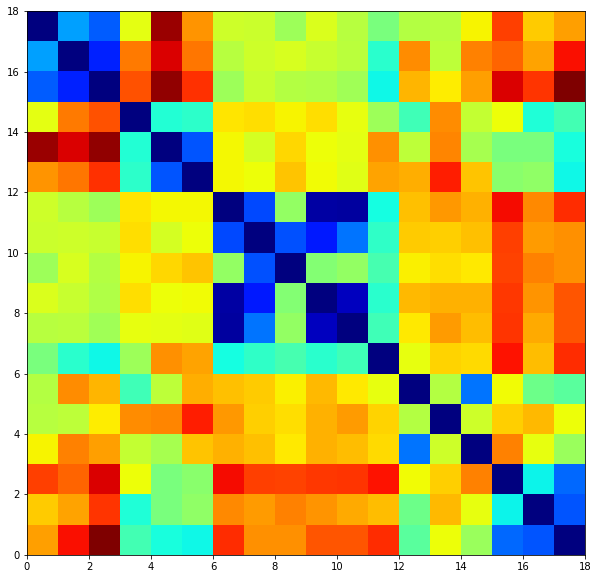

In [119]:
mfcc_dist = cos_dist_mat_calc(features,"ddmfcc")#cos_dist_mat_calc(features,"ddmfcc")

In [120]:
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(mfcc_dist, method='ward', metric='euclidean')

/home/thilina/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b'],
 'dcoord': [[0.0, 0.6314234037544338, 0.6314234037544338, 0.0],
  [0.0, 1.638102230702791, 1.638102230702791, 0.6314234037544338],
  [0.0, 0.7154248839701876, 0.7154248839701876, 0.0],
  [0.0, 0.9830154865755009, 0.9830154865755009, 0.7154248839701876],
  [0.0, 0.6802596329614563, 0.6802596329614563, 0.0],
  [0.0, 1.2074174069736188, 1.2074174069736188, 0.6802596329614563],
  [0.9830154865755009, 1.92372710530127, 1.92372710530127, 1.2074174069736188],
  [1.638102230702791,
   2.8464506621732735,
   2.8464506621732735,
   1.92372710530127],
  [0.0, 0.49232181881593595, 0.49232181881593595, 0.0],
  [0.0, 0.8572237975908138, 0.8572237975908138, 0.49232181881593595],
  [0.0, 0.1566764602015395, 0.1566764602015395, 0.0],
  [0.0, 0.21367492941552577, 0.21367492941552577, 0.1566764602015395],
  [0.0, 0.8550209727697252, 0.8550209727697252, 0.21367492941552577]

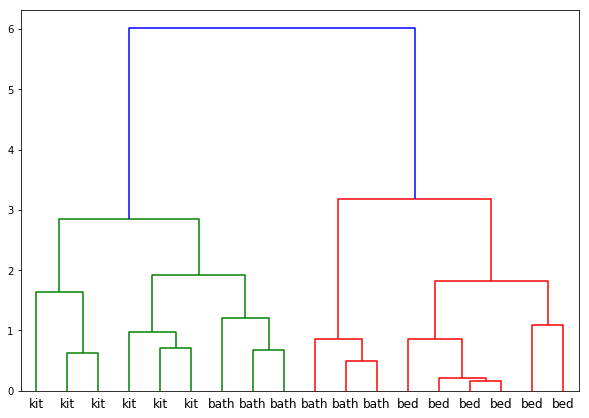

In [125]:
plt.figure(figsize=(10,7))
dendrogram(Z, labels=label_list, p=5)

In [122]:
t = 0.9#0.7*max(Z[:,2])
clusters = fcluster(Z, 2.5, criterion='distance')#100

In [123]:
clusters

array([3, 3, 3, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 2, 2, 2], dtype=int32)

# Remove below this

ft = []
for m2 in range(0,len(features)):
    ft.append(features['feature'].values[m2].reshape(-1))

ft

len(ft[0])

norm = [0] * len(ft[0])

dist = []
for t in range(0,9):
    dist.append(numpy.linalg.norm(norm-ft[t]))

dist


for m3 in range(0,len(features)):
    print features['feature'].values[m3][0]

features['feature'].values[0]

for itr2 in range(0,len(features['feature'].values[0])):
    print features['feature'].values[0][itr2][0]

#Separating features related to mfcc, dmfcc, ddmfcc
ft_mfcc_tmp = []
ft_dmfcc_tmp = []
ft_ddmfcc_tmp = []
ft_mfcc = []
ft_dmfcc = []
ft_ddmfcc = []
for itr1 in range(0,len(features['feature'])):
    for itr2 in range(0,len(features['feature'].values[itr1])):
        ft_mfcc_tmp.append(features['feature'].values[itr1][itr2][0])
        ft_dmfcc_tmp.append(features['feature'].values[itr1][itr2][1])
        ft_ddmfcc_tmp.append(features['feature'].values[itr1][itr2][2])
    ft_mfcc.append(ft_mfcc_tmp)  
    ft_dmfcc.append(ft_dmfcc_tmp)
    ft_ddmfcc.append(ft_ddmfcc_tmp)  

len(ft_mfcc)

print features['feature'].values[1]

# Clustering

from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

def gmm_cluster(ft, n_comp, max_iter ,rand_stat):
    gmm = GaussianMixture(n_components=n_comp, covariance_type ='full', \
                  init_params = 'random', max_iter = max_iter, random_state=rand_stat)#random_state=1024
    gmm.fit(ft)
    #print(gmm.means_.round(2))
    cluster = gmm.predict(ft)
    print cluster
    return cluster

def plot_cluster(cluster,title,pic):
    plt.figure(figsize = (30,5))
    plt.title(title)
    plt.xlim(0,len(cluster)-1)
    plt.plot(cluster)
    plt.savefig(visual_path + pic +".png")
    plt.show()

## GMM clustering

cluster = gmm_cluster(ft,3,100,1024)
plot_cluster(cluster,"GMM clustering for appended features","app_features")

cluster_mfcc = gmm_cluster(ft_mfcc,3,100,1024)
plot_cluster(cluster_mfcc,"GMM clusterin for mfcc","mfcc")

cluster_dmfcc = gmm_cluster(ft_dmfcc,3,100,1024)
plot_cluster(cluster_dmfcc,"GMM clusterin for dmfcc","dmfcc")

cluster_ddmfcc = gmm_cluster(ft_ddmfcc,3,100,1024)
plot_cluster(cluster_ddmfcc,"GMM clusterin for ddmfcc","ddmfcc")

## Hierarchical clustering

from sklearn.cluster import AgglomerativeClustering

hy_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hy_pred = hy_cluster.fit_predict(ft)
print hy_pred

plot_cluster(hy_pred, "Hierarchical clustering for hierarchical clustering of appended features","app_hierarchical")

x = np.delete(features['feature'].values[0],(0),axis=0)
#x = numpy.delete(x, (0), axis=0)

features['feature'].values[0].reshape(-1)

# Above from here

len(x)

features['feature'].values[0][0]

numpy.concatenate( features['feature'].values, axis=0 )

for index, row in features.iterrows():
    print index
    features[0,'features2']=row[1].reshape(-1)

features = pd.DataFrame()
bookmark=0
ft = []
for label in dic:
    for sess in dic[label]:
        features2 = pd.read_csv("vector/"+sess+'.csv',header=None)
        ft.append(features2.values.reshape(-1).T)
        #print pd.DataFrame(data=features2.values.T.reshape(-1)).transpose()
        #features.append(pd.DataFrame(features2.values.reshape(-1).transpose()),ignore_index=True)
        #features.append(pd.DataFrame(data=features2.values.T.reshape(-1)).transpose())
        #my_data = genfromtxt("vector/"+sess+'.csv', delimiter=',')
        #features2.loc[bookmark]=label,my_data
        #bookmark+=1

features2

for vec in ft:
    print len(vec)

for t in range(0,9):
    if t!=7:
        print numpy.linalg.norm(ft[4]-ft[t])

#features.set_value()
pd.DataFrame(columns=[ft[0],ft[1],ft[1],ft[2],ft[3],ft[4],ft[5],ft[6],ft[7],ft[8]])

pd.DataFrame(ft).fillna(value=0, inplace=True)
ft2=np.asarray(ft)

np.savetxt("file_name.csv", ft2, delimiter=",", fmt='%s', header=None)

type(ft)

test = pd.DataFrame()

test = (pd.DataFrame(ft[0]))

test.append(pd.DataFrame(ft[3]))

pd.DataFrame(np.concatenate(ft))

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(np.asarray(ft).reshape(-1, 1))  

from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type ='full', \
              init_params = 'random', max_iter = 100, random_state=3)
gmm.fit(ft)
print(gmm.means_.round(2))
cluster = gmm.predict(ft)